In [1]:
import fiona

In [2]:
shape = fiona.open("SIH15_LATLONG_WGS84.shp")
print(shape.schema)

{'properties': OrderedDict([('CD_GEOCODI', 'float:24.15'), ('LAT_SC', 'float:24.15'), ('LONG_SC', 'float:24.15'), ('P_SEXO', 'str:254'), ('P_IDADE', 'int:10'), ('P_RACA', 'int:10'), ('LV_INSTRU', 'int:10'), ('LAT_CNES', 'float:24.15'), ('LONG_CNES', 'float:24.15'), ('CNES', 'int:10'), ('GESTOR_IDE', 'int:10'), ('CAR_INTEN', 'int:10'), ('CMPT', 'int:10'), ('DT_EMISSAO', 'int:10'), ('DT_INTERNA', 'int:10'), ('DT_SAIDA', 'int:10'), ('COMPLEXIDA', 'int:10'), ('ESPECIALID', 'int:10'), ('PROC_RE', 'int:10'), ('DIAG_PR', 'str:254'), ('DIAG_SE1', 'str:254'), ('DIAG_SE2', 'str:254'), ('DIAG_SE3', 'str:254'), ('DIARIAS', 'int:10'), ('DIARIAS_UT', 'int:10'), ('DIARIAS_UI', 'int:10'), ('DIAS_PERM', 'int:10'), ('FINACIAME', 'int:10'), ('VAL_TOT', 'float:24.15'), ('COD_DA', 'int:10'), ('DA', 'str:254'), ('SUB', 'str:254'), ('STS', 'str:254'), ('CRS', 'str:254')]), 'geometry': 'Point'}


In [8]:
procedures = []
for record in shape:
    procedures_info = record['properties']
    
    interested_features = { 'P_IDADE', 'ESPECIALID', 'DIAS_PERM' }
    filtered_procedures = { key:value for key,value in procedures_info.items() if key in interested_features }

    procedures.append(list(filtered_procedures.values()))

In [9]:
import numpy as np
procedures_array = np.array(procedures)

Text(0.5,0,'Idade')

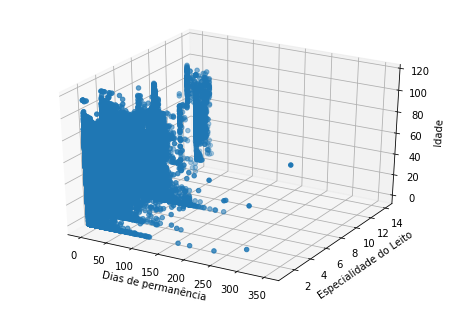

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(procedures_array[:,2], procedures_array[:,1], procedures_array[:,0])
ax.set_xlabel('Dias de permanência')
ax.set_ylabel('Especialidade do Leito')
ax.set_zlabel('Idade')

Text(0.5,0,'Idade')

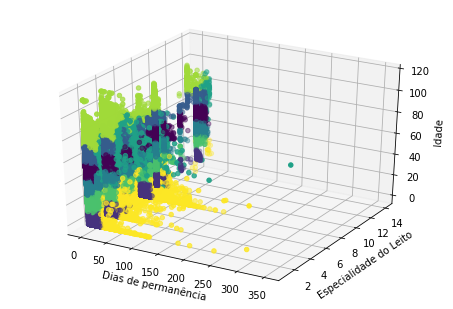

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans()
kmeans = kmeans.fit(procedures_array)
labels = kmeans.labels_

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(procedures_array[:,2], procedures_array[:,1], procedures_array[:,0], c=labels)
ax.set_xlabel('Dias de permanência')
ax.set_ylabel('Especialidade do Leito')
ax.set_zlabel('Idade')